# Stage Talens, séance 3

# Challenge MNIST-10 par caractéristiques en grande dimension, et introduction aux réseaux de neuronnes

<br><br><br>

***
***

<br><br><br>

# I. Prise en main

In [1]:
from utilitaires_chargement_ import *

* Image en niveaux de gris : tableau bidimensionnel de $H \times L$ pixels. 
* La valeur de chaque pixel est un **entier compris entre 0 et 255**.
* On peut afficher une image dans ce notebook à l'aide de la fonction `affichage()`
    * Visuellement : **pixel de valeur 0 = noir, pixel de valeur 255 = blanc.** 
    * Pixels de valeurs intermédiaires affichés en gris, et presque blancs si valeur proche de 255, presque noirs si valeur proche de 0.

### Manipulation des images en Python
Affichons une image `x` de taille $28 \times 28$ que nous avons importée, grâce à la fonction `affichage`

In [ ]:
# Dans cette cellule, afficher l'image x


### Tranche  de pixels 

* `x[a:b,c:d]` extrait les pixels appartenant aux lignes `a` à `b-1` (inclus) et colonnes `c` à `d-1` (inclus). 
* `x[a:b,c:d]` est un tableau de taille $(b-a) \times (d-c)$. 
* Pour récupérer tous les pixels de `x` appartenant aux colonnes `c` à `d-1`, on utilise `x[:,c:d]`; et `x[a:b,:]` pour tous les pixels appartenant aux lignes `a` à `b-1`.

<b><font color=red> Écrire une ligne de code pour afficher uniquement les colonnes 11 à 23 de l'image $x$ :</font></b>

In [ ]:
#affichage(x[:,11:24])

<b><font color=red> Afficher uniquement les pixels du carré en haut à gauche de l'image de côté 10 pixels (les pixels compris entre les lignes de 0 à 9 et les colonne 0 à 9 de l'image $x$) : </font></b>

In [ ]:
#affichage(x[0:10, 0:10])

<b><font color=red> Avec la fonction `print()`, afficher la valeur des pixels de ce carré : </font></b>

In [ ]:
# Afficher la valeur des pixel du carré en haut à gauche de côté 10 pixels


<b><font color=red> Avec la fonction `np.sum()`, calculer la moyenne des valeur des pixels de ce carré : </font></b>

In [ ]:
moyenne_pixels = ... 

print(moyenne_pixels)

<br><br><br><br><br>

***
***

<br><br><br><br><br>

# II. Retour sur MNIST-4 : apprendre automatiquement les caractéristiques

On va paramétrer nos deux caractéristiques par deux tableaux de poids `w1` et `w2`. Écrire une fonction qui calcule la caractéristique de `x`en fonction d'un tableau de poids `w` :

In [ ]:
def calcule_caracteristique(x, w):
    N = 28*28
    ...
    c = ...
    return c

Current score = 53.26381476311685


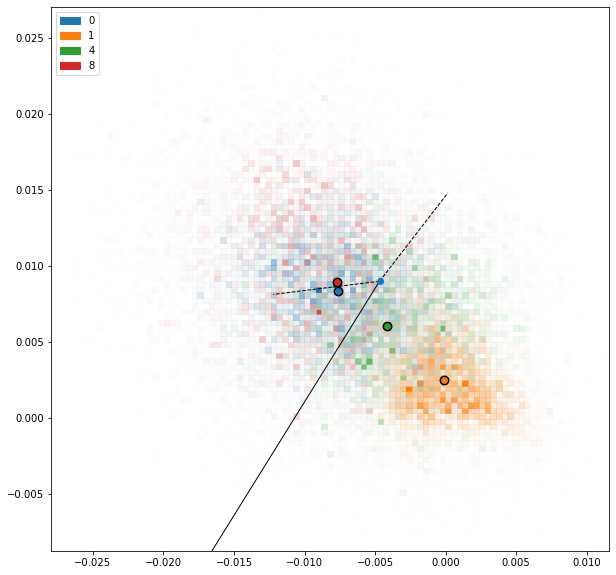

In [2]:
N = 28*28

w1_0 = tableau_aleatoire(N+1)
w2_0 = tableau_aleatoire(N+1)

c_train0 = get_c_train(w1_0, w2_0, x_train_4_scaled)
best_score = get_score(c_train0)
best_c_train = c_train0

print("Current score =", best_score)
visualiser_histogrammes_2d_mnist_4_vor(best_c_train)

Choissez un nombre de pas `K`à faire, et un taille de pas `taille_pas`puis exécuter pour essayer une descente de K pas :

Current score = 50.39412102799902


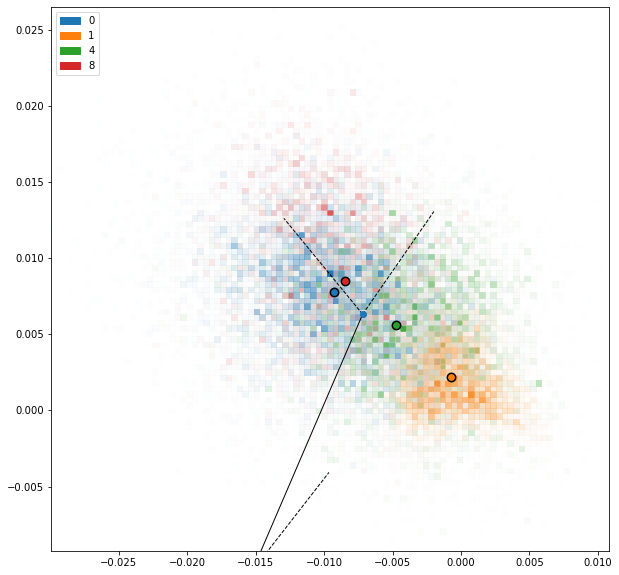

Current score = 50.03284341899992


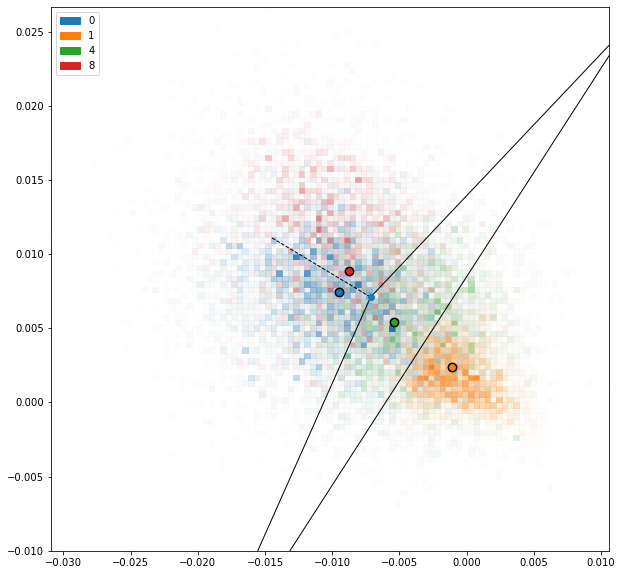

Current score = 49.13375482387717


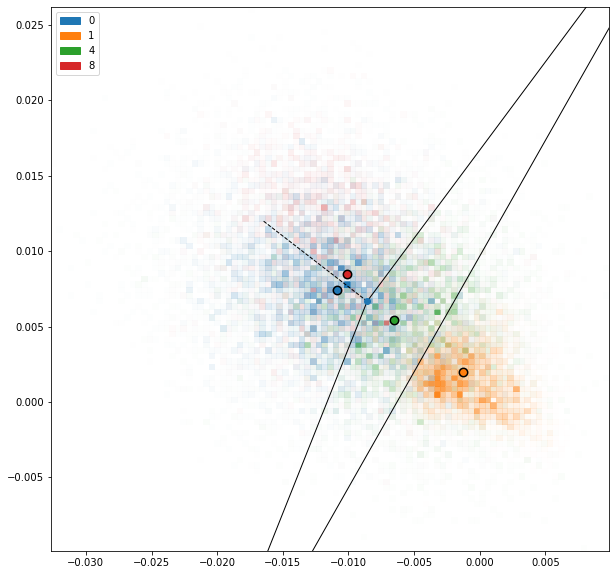

Current score = 47.848756055505376


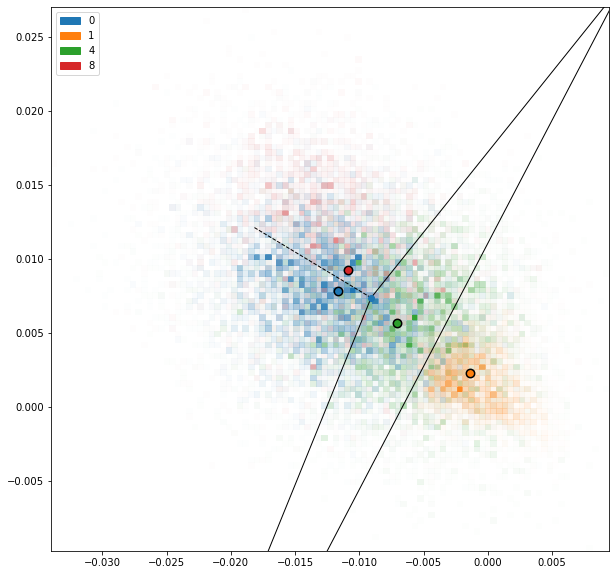

Current score = 46.83061006650792


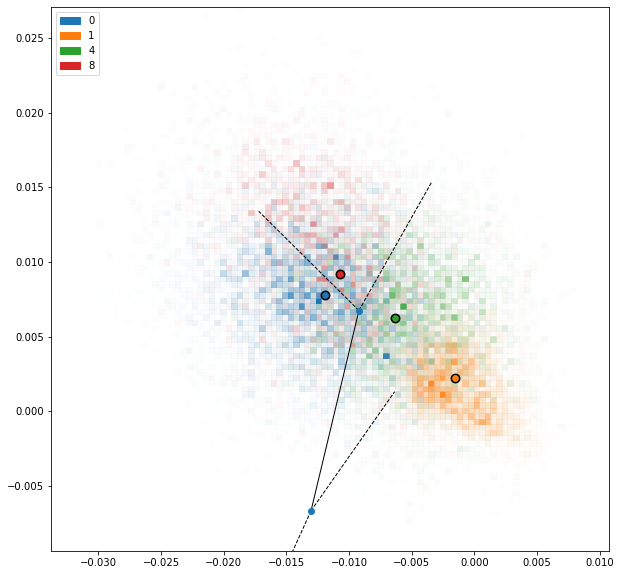

In [ ]:
# Compléter K : 
K =  10

# Compléter taille_pas : 
taille_pas = 0.1

# Exécuter la cellule
best_score, best_c_train, w1_0, w2_0 = faire_K_pas(K, w1_0, w2_0, taille_pas, best_score, best_c_train)

print("Best score =", best_score)
visualiser_histogrammes_2d_mnist_4_vor(best_c_train)

# III. Challenge MNIST-10 : classifier les chiffres de 0 à 9

La base de données MNIST-10 contient des images de chiffres de 0 à 9 de taille $28 \times 28$ en niveaux de gris. 

* Images d'entraînement : liste `x_train_10`.
* Images de test : liste `x_test_10`. 

Les chiffres $y \in \{0,\ldots,9\}$ associés aux images d'entraînement : liste `y_train_10`

## III.1 Visualisation d'images d'entraînement 

* `x_train_par_population` : liste de longueur 10
* `x_train_par_population[i]` pour $i \in \{0,\ldots,9\}$ : liste représentant la population de chiffres $i$.

Exécutez la cellule ci-dessous afin d'afficher les dix premières images au sein de chaque population.

In [ ]:
for i in range(10):
    affichage_dix(x_train_par_population[i])

## III.2 Tentative avec deux caractéristiques

In [ ]:
def deux_caracteristiques(x):
    c1 = np.sum(x[:,14])/28
    c2 = np.sum(x[14,:])/28
    
    return [c1, c2] # Renvoit deux caractéristiques sous la forme d'une liste à deux éléments [c1, c2]

In [ ]:
# On commence par définir et initialiser la liste c_train (vide au début)
c_train = []

# On la remplit à l'aide d'une boucle for :
for x in x_train_10:
    c_train.append(deux_caracteristiques(x))

# On segmente par population
c_train_par_population = [np.array(c_train)[y_train_10==k] for k in range(10)]

visualiser_histogrammes_2d_mnist_10_vor(c_train)

In [ ]:
# Calcul du score

theta = [moyenne(liste_car) for liste_car in c_train_par_population]

y_est_train = []

# On remplit y_est_train à l'aide d'une boucle :
for c in c_train:
    y_est_train.append(classification_dist_moy(c, theta))

# Affichage du score
print("Score =", f"{100*score(y_est_train, y_train_10):.2f}%")

<br><br><br>

***
***

<br><br><br>

## III.3 Définir autant de caractéristiques que nécessaire

**Benchmark :** Proposition de 4 caractéristiques utilisées comme référence :

In [ ]:
def mes_caracteristiques(x):
    #Prend en entrée une image x et renvoit une liste contenant toutes vos caractéristiques
    
    liste_car = []
    N = 2
    long = int(28/N)
    for i in range(N):
        for j in range(N):
            c = np.mean(x[long*i:long*(i+1), long*j:long*(j+1)])
            liste_car.append(c)
    
    return liste_car

<b><font color=red>1. Définissez autant de caractéristique que vous souhaitez dans la cellule ci-dessous </font></b>

<b><font color=red>2. Exécutez la cellule qui suit pour afficher le score </font></b>

<b><font color=red>3. Essayer d'améliorer votre score ! </font></b>

In [ ]:
def mes_caracteristiques(x):
    #Prend en entrée une image x et renvoit une liste contenant toutes vos caractéristiques
    
    liste_car = []
    
    ...
    
    return liste_car

In [ ]:
c_train = []

for x in x_train_10:
    c_train.append(mes_caracteristiques(x))

c_train_par_population = [np.array(c_train)[y_train_10==k, :] for k in range(10)]

y_est_train = []
theta_10 = [np.mean(liste_car, axis=0) for liste_car in c_train_par_population]

for c in c_train:
    y_est_train.append(classification_dist_moy(c, theta_10))

# Affichage du score
print("Score =", f"{100*score(y_est_train, y_train_10):.2f}%")

<br><br><br><br><br>

***
***

<br><br><br><br><br>

### Erreur de test


<b><font color=red>Quand vous êtes content de votre score, ou que le temps est écoulé :</font></b>

On applique maintenant l'algorithme de classification précédent aux images de test `x_test_10`. 

Exécutez la cellule suivante qui calcule `c_test` et télécharge le fichier `y_est_test.csv`

In [ ]:
# On commence par définir et initialiser la liste c_test (vide au début)
c_test = []

# On la remplit à l'aide d'une boucle for :
for x in x_test_10:
    c_test.append(mes_caracteristiques(x))
    
y_est_test = []

# On remplit y_est_test à l'aide d'une boucle :
for c in c_test:
    y_est_test.append(classification_dist_moy(c, theta_10))

sauver_et_telecharger_mnist_10(y_est_test, 'y_est_test.csv')

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/participants/challenges/118/)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?

# IV. Introduction aux réseaux de neurones : explication en classe

![Schéma réseau de neurones](https://github.com/challengedata/challenge_educatif_mnist/blob/main/image_reseau_mnist.jpg?raw=true)